# Invariants of semistable objects
$\def\bb{\mathbb}$
We assume that for any "stability function" $z:\bb Z^r\to\bb C$ and for any "dimension vector" $d\in\bb N^r$ we have a "stacky" invariant $A_z(d)\in\bb Q(y)$ "counting" $z$-semistable objects.
$\def\ang#1{\left<#1\right>}$
We assume that the lattice $\bb Z^r$ is equipped with a skew-symmetric form $\ang{-,-}$ and we equip $\bb Q(y)[x_1,\dots,x_r]$ with the corresponding twisted product (the quantum affine plane).
The above invariants are assumed to satisfy the property that (in the quantum affine plane)
$$A_{total}=\prod^\to_{\ell}A_{z,\ell},\qquad A_{z,\ell}=1+\sum_{z(d)\in\ell}A_z(d)x^d,$$
is independent of $z$, where the product runs over rays $\ell$ in the upper half-plane ordered clockwise.
We can compute invariants $A_z(d)$ for any $z$ if they are known for one $z$, in particular, if $A_{total}$ is known
(we can use the algorithm from [arXiv:math/0204059](https://arxiv.org/abs/math/0204059)).
Such transformations between invariants for different stability parameters are known as wall-crossing formulas and are computed here.

$\def\Om{\Omega}\def\Exp{\operatorname{Exp}}\def\rbr#1{\left(#1\right)}$
We are also interested in invariants $\bar\Om_z(d)$, $\Om_z(d)$ (rational and integer DT invariants respectively) given by the formulas
$$A_{z,\ell}=\exp\rbr{\frac{\sum_{z(d)\in\ell}\bar\Om_z(d)x^d}{y^{-1}-y}}
=\Exp\rbr{\frac{\sum_{z(d)\in\ell}\Om_z(d)x^d}{y^{-1}-y}}.$$

For a quiver $Q$ without relations, we have
$$A_z(d)=(-y)^{\chi(d,d)}\frac{[R_z(Q,d)]}{[GL_d]},$$
where
$\chi$ is the Euler form of $Q$
and $R_z(Q,d)\subset R(Q,d)=\bigoplus_{a:i\to j}Hom(k^{d_i},k^{d_j})$ is a subspace of $z$-semistable representations. 
In particular, for the trivial stability $z$, we have $R_{z}(Q,d)=R(Q,d)$ and immediately obtain $A_{total}(d)$. 
This formula can be used to compute all other invariants.

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from msinvar import *
set_plots()

### Some tests

Define the quiver $1\to2$ and the corresponding wall-crossing structure for dimension vectors $\le(3,3)$:

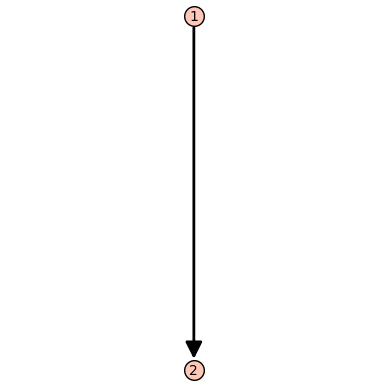

In [3]:
Q=Quiver('1-2', prec=[2,2]); show(Q)

Total stacky invariants (corresponding to the trivial stability parameter):

In [4]:
A=Q.total(); A.dict()

{(0, 0): 1,
 (1, 0): y/(-y^2 + 1),
 (2, 0): y^2/(y^6 - y^4 - y^2 + 1),
 (0, 1): y/(-y^2 + 1),
 (1, 1): y^3/(-y^4 + 2*y^2 - 1),
 (2, 1): y^5/(-y^8 + 2*y^6 - 2*y^2 + 1),
 (0, 2): y^2/(y^6 - y^4 - y^2 + 1),
 (1, 2): y^5/(-y^8 + 2*y^6 - 2*y^2 + 1),
 (2, 2): y^8/(y^12 - 2*y^10 - y^8 + 4*y^6 - y^4 - 2*y^2 + 1)}

Stacky invariants for the stability parameter $z=(1,0)$:

In [5]:
z=Stability([1,0]); print(z)
I=Q.stacky(z)
I.dict()

Stability function [[1, 0], [1, 1]]


{(0, 0): 1,
 (1, 0): y/(-y^2 + 1),
 (2, 0): y^2/(y^6 - y^4 - y^2 + 1),
 (0, 1): y/(-y^2 + 1),
 (1, 1): (-y)/(y^2 - 1),
 (0, 2): y^2/(y^6 - y^4 - y^2 + 1),
 (2, 2): y^2/(y^6 - y^4 - y^2 + 1)}

Integer DT invariants for the stability $z=(1,0)$. Note that there are just $3$ stable objects:

In [6]:
I1=Q.stk2int(I)
I1.dict()

{(1, 0): 1, (0, 1): 1, (1, 1): 1}

In [7]:
y=Q.y
I.series().pLog()*(1/y-y) #direct computation as series

x0 + x1 + x0*x1

Integer DT invariants for the stability parameter $z=(0,1)$. Note that there are just $2$ stable objects:

In [8]:
I2=Q.stk2int(Q.stacky([0,1]))
I2.dict()

{(1, 0): 1, (0, 1): 1}

### Kronecker quiver

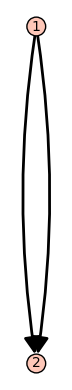

In [9]:
Q=KroneckerQuiver(2,prec=[3,3]); show(Q)

Integer DT invariants for $z=(1,0)$:

In [10]:
I=Q.stk2int(Q.stacky([1,0]))
I.dict()

{(1, 0): 1,
 (0, 1): 1,
 (1, 1): (-y^2 - 1)/y,
 (2, 1): 1,
 (1, 2): 1,
 (3, 2): 1,
 (2, 3): 1}

In [11]:
Q.Om([1,0]).dict() #the same computation

{(1, 0): 1,
 (0, 1): 1,
 (1, 1): (-y^2 - 1)/y,
 (2, 1): 1,
 (1, 2): 1,
 (3, 2): 1,
 (2, 3): 1}

Integer DT invariants for $z=(0,1)$:

In [12]:
I=Q.stk2int(Q.stacky([0,1]))
I.dict()

{(1, 0): 1, (0, 1): 1}

### Cyclic quiver with 2 vertices

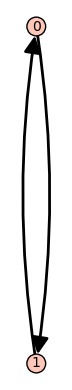

In [13]:
Q=CyclicQuiver(2,prec=[3,3]); show(Q)

In [14]:
Q.stk2int(Q.stacky([1,0])).dict()

{(1, 0): 1, (0, 1): 1, (1, 1): -y}

In [15]:
I=Q.stable([1,0], slope=1/2) #based on arXiv:0708.1259
I.dict()

{(1, 1): y^2}

### 3-Kronecker quiver

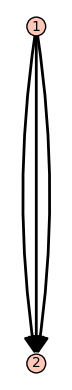

In [16]:
Q=KroneckerQuiver(3,prec=[3,3]); show(Q)

In [17]:
Q.Om([1,0]).simp().dict([2,2])

{(1, 0): 1,
 (0, 1): 1,
 (1, 1): (y^4 + y^2 + 1)/y^2,
 (2, 1): (y^4 + y^2 + 1)/y^2,
 (1, 2): (y^4 + y^2 + 1)/y^2,
 (2, 2): (-y^10 - y^8 - y^6 - y^4 - y^2 - 1)/y^5}